In [20]:
import pandas as pd
from gensim import corpora, models
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from random import randint

In [8]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_reviews.csv')

In [9]:
# Tokenize the content
tokenized_content = [word_tokenize(text) for text in df['content']]

In [10]:
# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_content)
corpus = [dictionary.doc2bow(text) for text in tokenized_content]

In [11]:
# Function to calculate coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [12]:
# Compute coherence values
model_list, coherence_values = compute_coherence_values(dictionary, corpus, tokenized_content, limit=40, start=2, step=2)

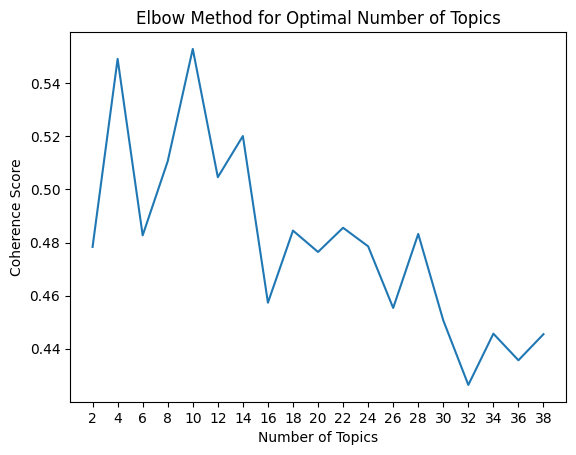

In [14]:
# Plot coherence values
x = range(2, 40, 2)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Elbow Method for Optimal Number of Topics')
# Change the x axis to start from 2
plt.xticks(x)
plt.show()

In [15]:
# Select the model with the highest coherence score
optimal_model = model_list[coherence_values.index(max(coherence_values))]
optimal_topics = coherence_values.index(max(coherence_values)) * 2 + 2  # Calculate optimal number of topics
print('Optimal number of topics:', optimal_topics)
print('Coherence score:', max(coherence_values))
print('Model:', optimal_model)

Optimal number of topics: 10
Coherence score: 0.5529619039701127
Model: LdaModel<num_terms=40717, num_topics=10, decay=0.5, chunksize=2000>


In [16]:
# Print the topics of the optimal model
for idx, topic in optimal_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

Topic: 0 
Words: 0.040*"Amazon" + 0.027*"buy" + 0.023*"card" + 0.016*"purchase" + 0.015*"price" + 0.014*"use" + 0.014*"gift" + 0.012*"money" + 0.012*"item" + 0.009*"product"
Topic: 1 
Words: 0.077*"app" + 0.026*"update" + 0.023*"work" + 0.020*"keep" + 0.019*"open" + 0.018*"fix" + 0.017*"go" + 0.017*"use" + 0.016*"cant" + 0.016*"time"
Topic: 2 
Words: 0.044*"search" + 0.030*"item" + 0.025*"change" + 0.023*"back" + 0.021*"list" + 0.016*"option" + 0.016*"app" + 0.014*"update" + 0.012*"product" + 0.011*"page"
Topic: 3 
Words: 0.097*"service" + 0.074*"customer" + 0.026*"Amazon" + 0.018*"help" + 0.017*"bad" + 0.017*"review" + 0.017*"issue" + 0.014*"product" + 0.014*"experience" + 0.013*"support"
Topic: 4 
Words: 0.067*"app" + 0.043*"load" + 0.034*"slow" + 0.033*"work" + 0.027*"use" + 0.025*"update" + 0.024*"App" + 0.011*"well" + 0.011*"take" + 0.011*"user"
Topic: 5 
Words: 0.034*"app" + 0.031*"like" + 0.026*"dont" + 0.023*"get" + 0.020*"Amazon" + 0.019*"want" + 0.016*"thing" + 0.015*"good" +

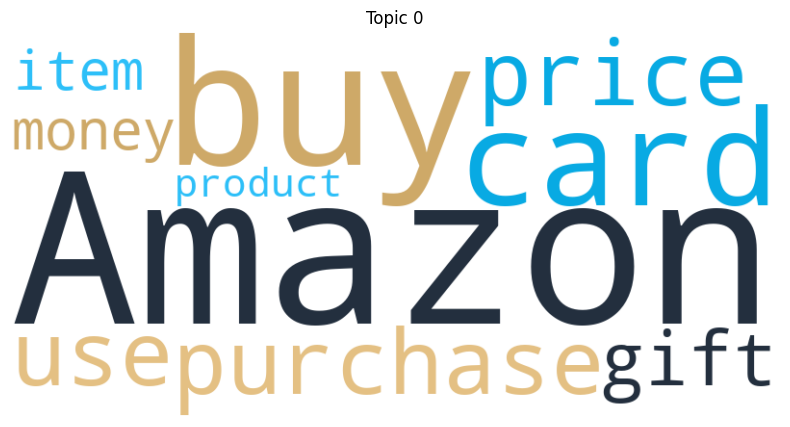

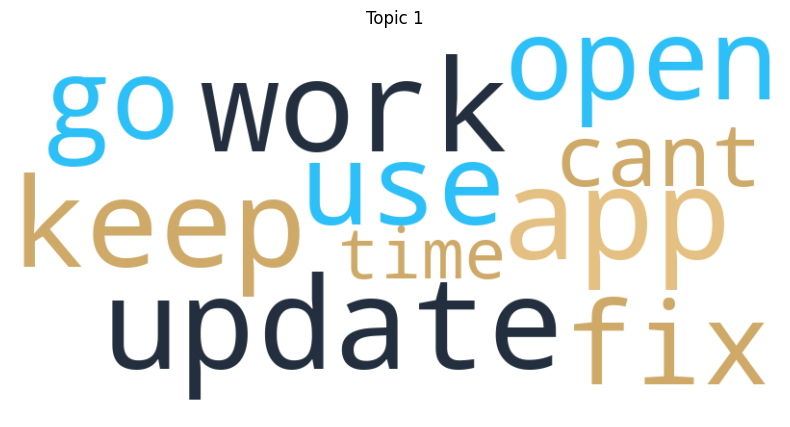

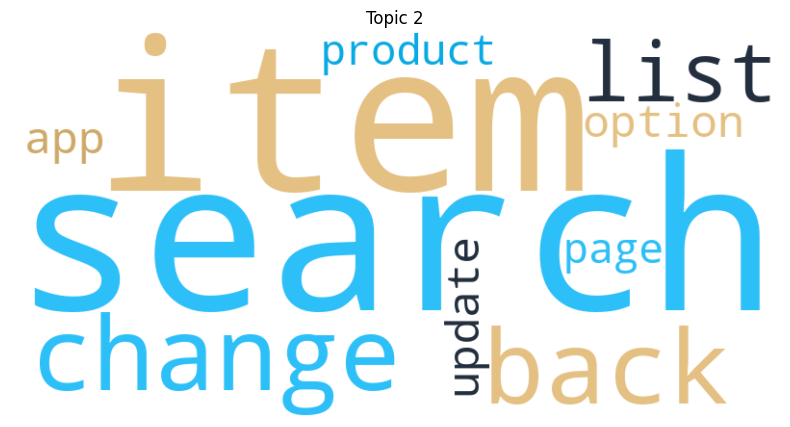

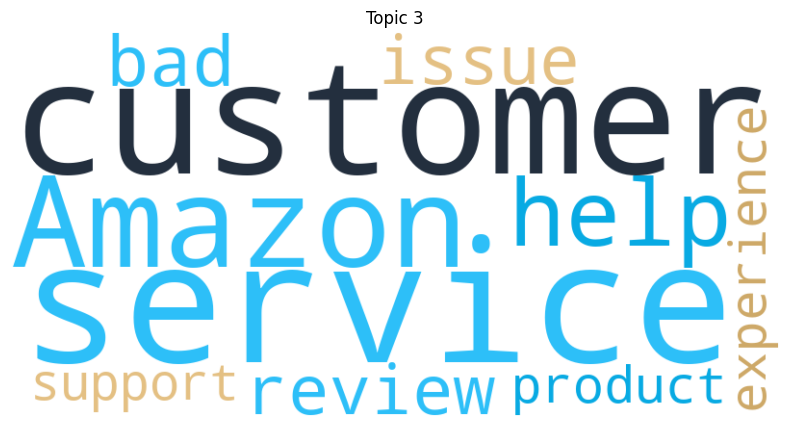

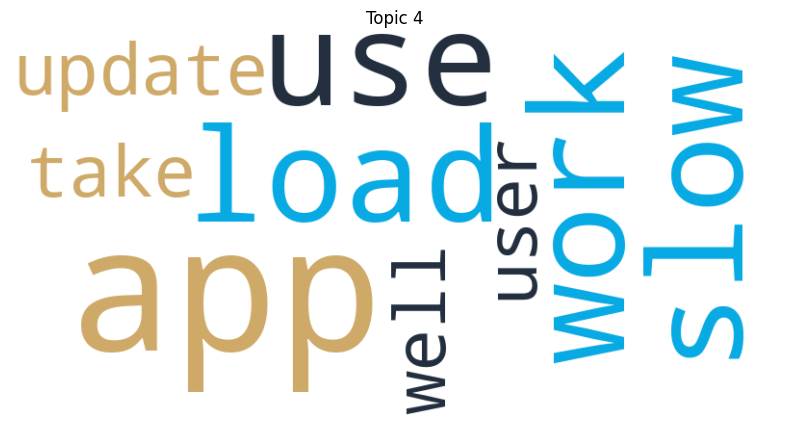

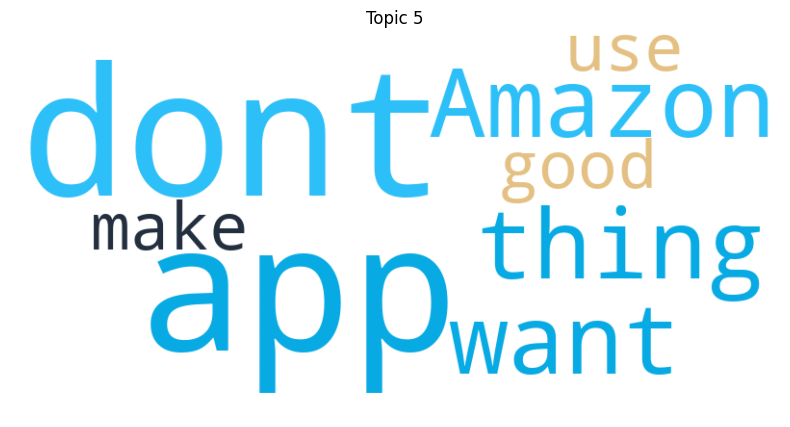

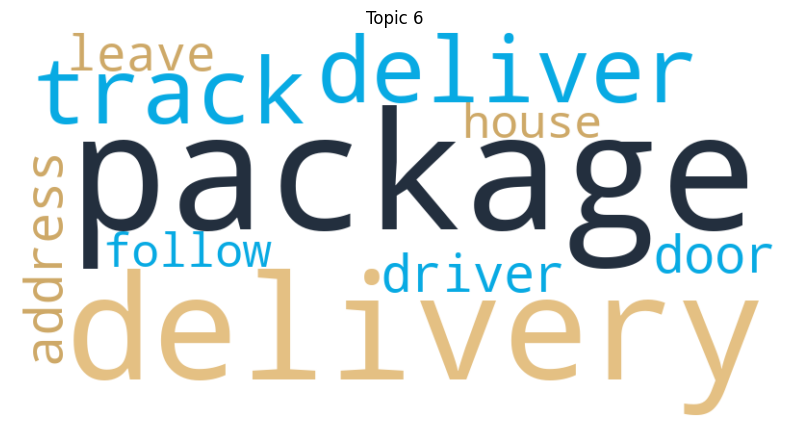

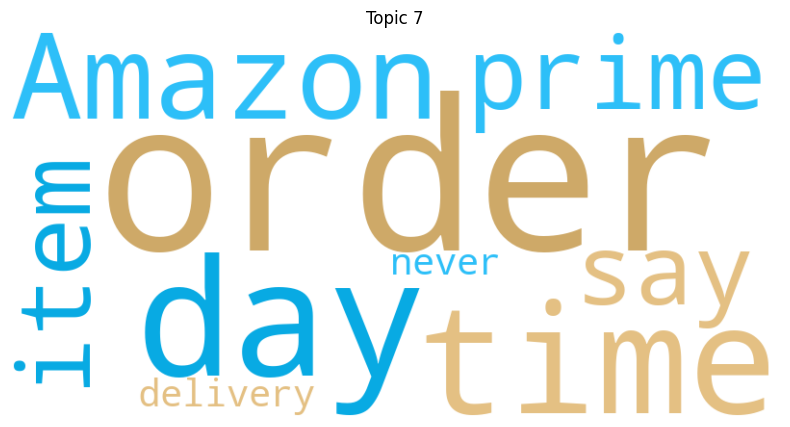

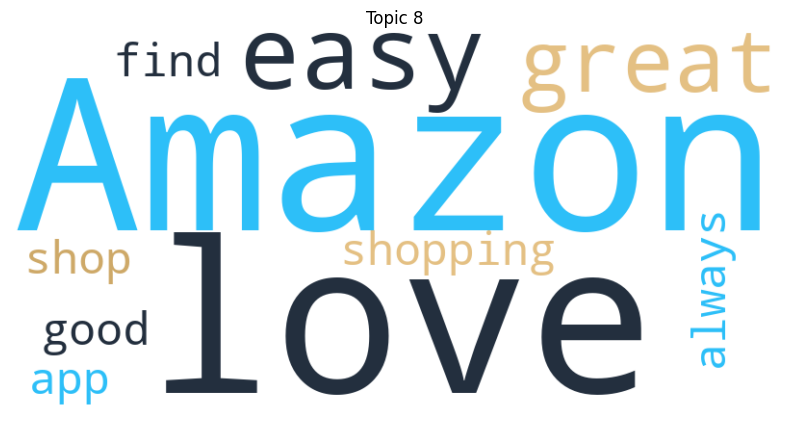

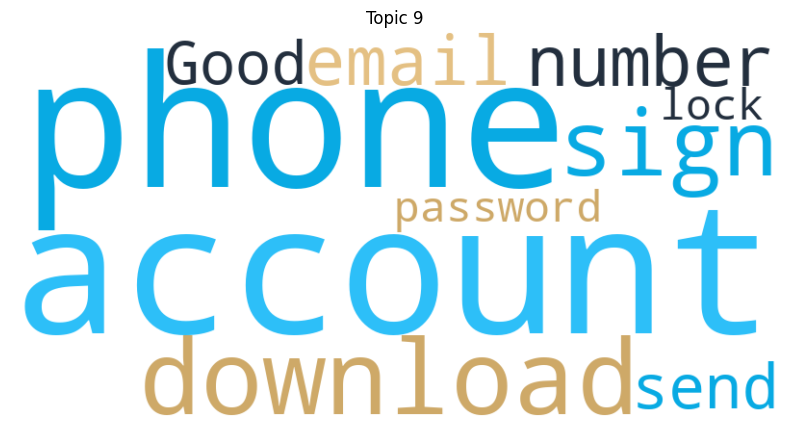

In [21]:
def amazon_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#2DBFF8","#08AAE3","#E4C083", "#CEA968","#232F3E"]  # Amazon's color scheme
    return colors[randint(0, len(colors) - 1)]

# Generate word cloud for each topic in the optimal model
for idx, topic in optimal_model.print_topics(-1):
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=amazon_color_func).generate(topic)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {idx}')
    plt.show()